# What is XGBoost?

XGBoost is an optimized implementation of gradient boosting that provides:

* Faster training through parallelization

* Regularization (L1 & L2) to reduce overfitting

* Sparse-aware and missing-value handling

* Built-in cross-validation

In [4]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.8/150.0 MB 987.4 kB/s eta 0:02:32
   ---------------------------------------- 1.0/150.0 MB 931.8 kB/s eta 0:02:40
   ---------------------------------------- 1.3/150.0 MB 932.1 kB/s eta 0:02:40
   ---------------------------------------- 1.3/150.0 MB 932.1 kB/s eta 0:02:40
   ---------------------------------------- 1.6/150.0 MB 943.0 kB/s eta 0:02:38
   ---------------------------------------- 1.6/150.0 MB 943.0 kB/s eta 0:02:38
   ------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# 1. Load dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\Machine Learning\Datasets\loan_approval_dataset.csv")

In [9]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
df.shape

(4269, 13)

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
# Clean column names (remove leading spaces)
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [12]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [15]:
# Convert categorical columns - 'education', 'self_employed'
df['education'] = df['education'].astype(str)
df['self_employed'] = df['self_employed'].astype(str)

In [17]:
# Remove leading/trailing whitespace
df['loan_status'] = df['loan_status'].str.strip()

# Map the cleaned values to integers
status_mapping = {
    'Approved': 1,
    'Rejected': 0,
    'Pending': -1  # Optional: only if 'Pending' exists and you want to keep it
}

df['loan_status'] = df['loan_status'].map(status_mapping)

In [18]:
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

In [19]:
# 3. Prepare features and target
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

In [21]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [22]:
# 5. Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [11:18:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [23]:
# 6. Predict and evaluate
y_pred = model.predict(X_test)

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.2f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.98
Precision: 0.99
Recall:    0.98
F1 Score:  0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.99      0.98      0.99       664

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

Confusion Matrix:
 [[397   7]
 [ 10 654]]


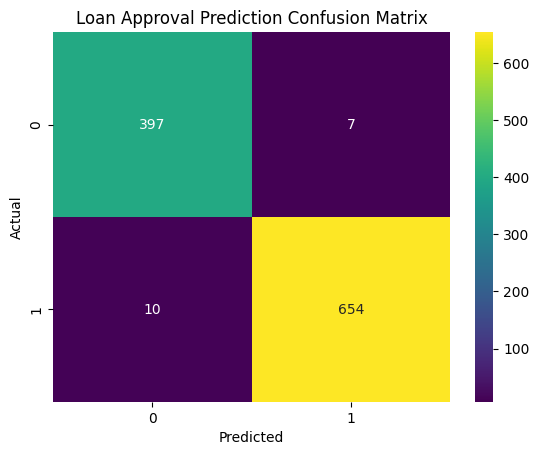

In [24]:
# 7. Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Loan Approval Prediction Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

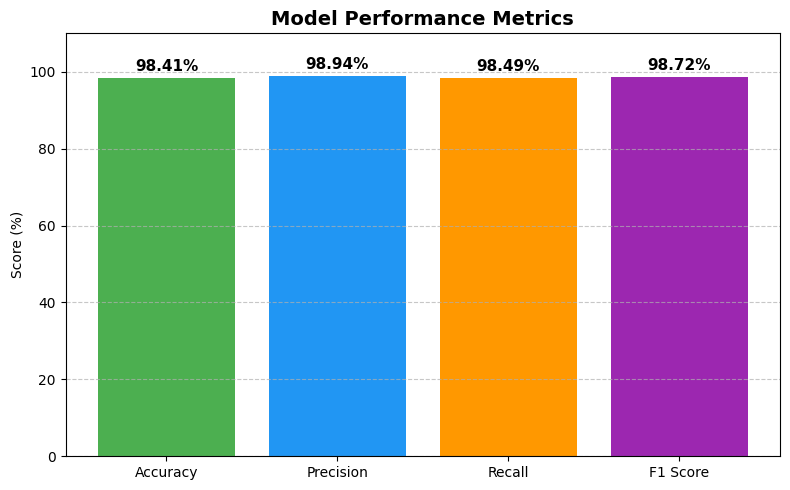

In [28]:
# 8. Plot colorful bar chart for metrics 

# Calculate metrics
metrics_values = [
    accuracy_score(y_test, y_pred) * 100,
    precision_score(y_test, y_pred) * 100,
    recall_score(y_test, y_pred) * 100,
    f1_score(y_test, y_pred) * 100
]

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=colors)

# Add text on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Model Performance Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Score (%)')
plt.ylim(0, 110)  # Give extra space for text
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
df_raw = df.copy()  # before one-hot encoding

In [45]:
def predict_loan_status(new_data_df):
    data = new_data_df.copy()

    # Fill numeric missing with median from training raw data
    numeric_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
                    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
                    'luxury_assets_value', 'bank_asset_value']
    for col in numeric_cols:
        if col in data.columns:
            data[col] = data[col].fillna(df_raw[col].median())

    # Fill categorical missing with mode from training raw data
    categorical_cols = ['education_ Not Graduate', 'self_employed_ Yes']
    for col in categorical_cols:
        if col in data.columns:
            data[col] = data[col].fillna(df_raw[col].mode()[0])
        else:
            data[col] = df_raw[col].mode()[0]

    # Convert categorical to string
    for col in categorical_cols:
        data[col] = data[col].astype(str)

    # One-hot encode new data
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Add missing dummy columns from training (X_train.columns) with zeros
    missing_cols = set(X_train.columns) - set(data.columns)
    for col in missing_cols:
        data[col] = 0

    # Ensure columns order same as training data
    data = data[X_train.columns]

    # Predict
    pred = model.predict(data)
    pred_proba = model.predict_proba(data)[:, 1]

    return pred, pred_proba

In [51]:
new_samples = pd.DataFrame([
    {
        'no_of_dependents': 5,
        'education': 'Not Graduate',
        'self_employed': 'Yes',
        'income_annum': 50000,
        'loan_amount': 300000,
        'loan_term': 360,
        'cibil_score': 400,
        'residential_assets_value': 0,
        'commercial_assets_value': 0,
        'luxury_assets_value': 0,
        'bank_asset_value': 0
    }
])

In [52]:
predictions, probabilities = predict_loan_status(new_samples)

for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    status = 'Approved' if pred == 1 else 'Rejected'
    print(f"Loan {i+1} prediction: {status} (Probability of approval: {prob:.2%})")

Loan 1 prediction: Rejected (Probability of approval: 0.01%)
